## Kaggle 房价预测实例

### 首先看下数据

In [50]:
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print(train.shape)
print(test.shape)
print(train.columns)
train.head(3)

(1460, 81)
(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### 一共有81维的特征，训练集数据一共有1460个样本
#### - 首先先把Id信息保存然后drop掉

In [51]:
train_Id = train['Id']
test_id = train['Id']
train.drop('Id', axis = 1, inplace=True)
test.drop('Id', axis = 1, inplace=True)

### 开始对数据进行预处理

- 我们发现训练集中居住面积大于4000有很多outliers数据，需要剔除掉

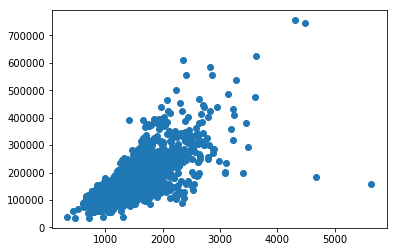

In [52]:
import matplotlib.pyplot as plt

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.show()
train.drop(train[train['GrLivArea']>4000].index, inplace=True)

### 开始填充数据中的缺失值
- 对连续数值填充为中位数
- 类别特征映射成对应的数值
- LotFrontage特征根据Neighborhood的中位数进行填充

In [53]:
numerical = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageArea", "BsmtFullBath", "BsmtHalfBath", "GarageCars"]
for column in numerical:
    train[column].fillna(train[column].median(), inplace=True)
neightborhood = train['Neighborhood'].unique()
for key in neightborhood:
    train.loc[(train['LotFrontage'].isnull()) & (train['Neighborhood'] == key), 'LotFrontage'] = train.loc[train['Neighborhood'] == key, 'LotFrontage'].median()
train['CentralAir'] = (train['CentralAir'] == 'Y') * 1.0
qual_dict = {None: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train["ExterQual"] = train["ExterQual"].map(qual_dict).astype(int)
train["ExterCond"] = train["ExterCond"].map(qual_dict).astype(int)
train["BsmtQual"] = train["BsmtQual"].map(qual_dict).astype(int)
train["BsmtCond"] = train["BsmtCond"].map(qual_dict).astype(int)
train["HeatingQC"] = train["HeatingQC"].map(qual_dict).astype(int)
train["KitchenQual"] = train["KitchenQual"].map(qual_dict).astype(int)
train["FireplaceQu"] = train["FireplaceQu"].map(qual_dict).astype(int)
train["GarageQual"] = train["GarageQual"].map(qual_dict).astype(int)
train["GarageCond"] = train["GarageCond"].map(qual_dict).astype(int)